In [ ]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.gaussian_process.kernels import RBF
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
import pandas as pd

In [ ]:
df = pd.read_csv (r'winemag-data-130k-v2.csv')
print(df.columns)

In [ ]:
import re
mylist = df['title'] # init the list
df["year"] = np.ones(df['title'].shape)
for i, l in enumerate(mylist):
    match = re.match(r'.*([1-2][0-9]{3})', l)
    if match is not None:
        # Then it found a match!
        df.at[i,'year'] = int(match.group(1))

In [ ]:
y = df['points']
x = df.drop('points',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
print(x_train.shape, y_train.shape)

In [ ]:
print(x_test.shape,y_test.shape)

In [ ]:
sns.relplot(
    data=df,
    x="year", y="points",
)

In [ ]:
df['year']

In [ ]:
df['year'].loc[lambda s: s < 1800 ]

In [ ]:
new_df = df.drop(np.append(df['year'].loc[lambda s: s < 1980 ].index.values,df['year'].loc[lambda s: s > 2022 ].index.values))

In [ ]:
sns.relplot(
    data=new_df,
    x="price", y="year",
)
sns.relplot(
    data=new_df,
    x="points", y="year",
)

In [ ]:

p_df = df.copy()
province_count = df['country'].value_counts()
for index, value in province_count.items():
    if value/df['country'].shape[0] < 0.01:
        p_df = p_df.replace(index,"Other")
sns.relplot(
    data=p_df,
    hue="country",x="price", y="country",
)
sns.relplot(
    data=p_df,
    hue="country",x="points", y="country",
)

In [ ]:
sns.relplot(
    data=new_df,
    hue="points",x="price", y="points",
)

In [ ]:
p_df = df.copy()
province_count = df['province'].value_counts()
for index, value in province_count.items():
    if value/df['province'].shape[0] < 0.01:
        p_df = p_df.replace(index,"Other")

In [ ]:
sns.relplot(
    data=p_df,
    hue="province",x="price", y="province",
)
sns.relplot(
    data=p_df,
    hue="province",x="points", y="province",
)

In [ ]:
p_df = df.copy()
province_count = df['variety'].value_counts()
for index, value in province_count.items():
    if value/df['variety'].shape[0] < 0.01:
        p_df = p_df.replace(index,"Other")
sns.relplot(
    data=p_df,
    hue="variety",x="price", y="variety",
)
sns.relplot(
    data=p_df,
    hue="variety",x="points", y="variety",
)

In [ ]:
# Create a visualization
sns.relplot(
    x="points", y="country", data=df,
    height = 10
)

In [ ]:
# #Create a visualization of points related to winery
# sns.relplot(
#     x="points", y="winery",data=df,
#     height = 10
# )
# p_df = df.copy()
# province_count = df['winery'].value_counts()
# for index, value in province_count.items():
#     if value/df['winery'].shape[0] < 0.01:
#         p_df = p_df.replace(index,"Other")
# sns.relplot(
#     data=p_df,
#     hue="winery",x="points", y="winery",
# )

In [ ]:
#Create a visualization of points related to province
sns.relplot(
    x="points", y="year",data=df,
    height = 30
)

In [ ]:
# Create a visualization
sns.relplot(
    x="points", y="designation", data=df,
    height = 30
)

In [ ]:
df

# Machine Learning part

In [124]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.gaussian_process.kernels import RBF
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
import pandas as pd

In [125]:
df = pd.read_csv (r'winemag-data-130k-v2.csv')
print(df.columns)

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')


In [126]:
# Labling the column variety into variables 
mappings = {}
labels = ['variety','winery','region_1','country','province']
for i in labels:
	label_encoder = preprocessing.LabelEncoder()
	df = df.dropna(subset=[i])
	df[i] = label_encoder.fit_transform(df[i])
	mappings[i] = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

In [127]:
df = df._get_numeric_data()
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [128]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
df.dropna(inplace=True)
y = df['points']
x = df.drop(['points'], axis=1)
pca = PCA(n_components=1)
x = pca.fit_transform(x)
print(x.shape)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

(101400, 1)


In [129]:

from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=5, p = 1)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)


correct_predictions = 0
# iterate over each label and check
for true, predicted in zip(y_test, y_pred):
	if abs(true - predicted) < 2.5:
		correct_predictions += 1
# compute the accuracy
accuracy = correct_predictions/len(y_test)
accuracy


0.6670850517004363

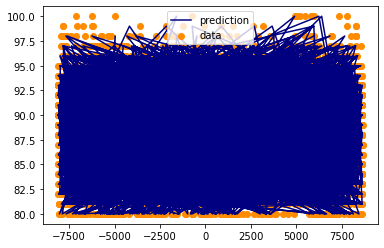

In [143]:
import matplotlib.pyplot as plt
y_ = neigh.predict(X_test)
plt.scatter(X_train, y_train, color="darkorange", label="data")
plt.plot(X_test, y_test, color="navy", label="prediction")
plt.ylim([82.5,85])
plt.axis("tight")
plt.legend()
plt.show()
